In [1]:
!nvidia-smi

Thu Oct  7 10:15:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install top2vec

In [3]:
import requests
import json
# "한겨레","조선일보","중앙일보","동아일보","경향신문","서울일보","KBS","MBC","SBS","YTN"

In [4]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":""},
        "published_at": {
            "from": "2021-09-29",
            "until": "2021-10-06"
            },
            "provider": [],
            "category": ["001000000"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js

{'result': 0,
 'return_object': {'documents': [{'byline': '이민수 기자',
    'category': ['정치>국회_정당', '정치>선거'],
    'category_incident': [],
    'dateline': '2021-09-29T07:42:20.000+09:00',
    'enveloped_at': '2021-09-28T11:40:54.000+09:00',
    'hilight': '이재명 .."폐기물 발생지 처리 원칙 지키겠다"…인천 발전 5대 공약 발표 더불어민주당 제20대 대통령선거 경선후보인 이재명 경기도지사가 인천 최대 현안인 수도권매립지와 관련해 ..“폐기물 발생지 처리와 친환경 매립지 조성의 원칙을 지키겠다”고 강조했다... .. .. ..이 지사는 28일 오전 민주당 인천시당에서 ..‘인천 발전 5대 공약’을 발표하면..',
    'news_id': '01200101.20210929114054001',
    'provider': '경기일보',
    'provider_news_id': '2382488',
    'published_at': '2021-09-29T00:00:00.000+09:00',
    'title': '이재명 "폐기물 발생지 처리 원칙 지키겠다"…인천 발전 5대 공약 발표'},
   {'byline': '김지환',
    'category': ['정치>행정_자치', '사회>사건_사고', '사회>교육_시험'],
    'category_incident': [],
    'dateline': '2021-09-28T18:06:23.000+09:00',
    'enveloped_at': '2021-09-28T18:06:23.000+09:00',
    'hilight': '법조일원화\'반쪽 시행\'… 판사 인력난 오나 재판연구원 제도 도입 이외에 .. ..1심 전면 단독화 등 답보상태 .. ..법원내부 .."국회 소극적" 비판 .. .. .. .. .. .. .

In [5]:
js['return_object'].keys()

dict_keys(['total_hits', 'documents'])

In [6]:
js['return_object']['documents'][0].keys()

dict_keys(['news_id', 'title', 'hilight', 'published_at', 'enveloped_at', 'dateline', 'provider', 'category', 'category_incident', 'byline', 'provider_news_id'])

In [7]:
total_hits = js['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 8724


In [8]:
js['return_object']['documents'][8723]['title']

'울산 부동산 개발사업자 5년간 배 이상 증가'

In [9]:
#total_hits = 10000
# 모든 타이틀
titles, hilights ,ths= [], [], []
for i in range(total_hits):
    title = js['return_object']['documents'][i]['title']
    hilight = js['return_object']['documents'][i]['hilight']
    th = title +","+ hilight

    #titles.append(title)
    #hilights.append(hilight)
    ths.append(th)

In [10]:
len(ths)

8724

In [11]:
# top2vec or dbscan

In [12]:
from top2vec import Top2Vec

In [13]:
#model = Top2Vec(ths)

In [14]:
model_multi = Top2Vec(documents = ths, speed="learn")

2021-10-07 10:17:12,749 - top2vec - INFO - Pre-processing documents for training
2021-10-07 10:17:14,302 - top2vec - INFO - Creating joint document/word embedding
2021-10-07 10:17:46,498 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-10-07 10:18:17,818 - top2vec - INFO - Finding dense areas of documents
2021-10-07 10:18:18,071 - top2vec - INFO - Finding topics


In [26]:
model_multi._get_document_vectors()

array([[-0.03389826, -0.03717333,  0.02454988, ..., -0.09607019,
        -0.03083874,  0.11724086],
       [-0.06547721,  0.00311925,  0.01188777, ..., -0.04328237,
        -0.03855659, -0.042672  ],
       [-0.09179689,  0.06359439, -0.00843771, ..., -0.00036148,
         0.0075748 ,  0.03031796],
       ...,
       [-0.04700966, -0.04773085, -0.01261379, ..., -0.016971  ,
        -0.02241107,  0.03339898],
       [-0.03421455,  0.03675295,  0.07457646, ..., -0.02061061,
         0.07262319,  0.11499161],
       [ 0.05609076, -0.01294527,  0.01831134, ...,  0.02086569,
        -0.04325067,  0.0611361 ]], dtype=float32)

In [15]:
model_multi.get_num_topics()

90

In [16]:
topic_sizes, topic_nums = model_multi.get_topic_sizes()

In [17]:
topic_sizes

array([407, 378, 368, 264, 236, 235, 220, 194, 191, 168, 155, 153, 152,
       147, 146, 144, 131, 117, 115, 114, 106, 105, 103, 101,  99,  97,
        96,  92,  92,  91,  90,  89,  88,  88,  87,  87,  86,  84,  83,
        82,  81,  79,  77,  76,  75,  73,  73,  73,  73,  72,  72,  71,
        70,  70,  70,  68,  68,  66,  65,  64,  63,  63,  61,  57,  56,
        56,  56,  55,  54,  54,  50,  50,  48,  48,  47,  46,  46,  45,
        44,  44,  41,  40,  39,  39,  38,  37,  35,  34,  31,  30])

In [17]:
topic_sizes

array([403, 396, 361, 355, 265, 212, 190, 188, 166, 148, 146, 141, 139,
       139, 138, 133, 132, 120, 116, 110, 106, 102, 102,  94,  91,  89,
        87,  87,  87,  85,  82,  81,  80,  80,  78,  74,  73,  70,  69,
        69,  68,  68,  68,  67,  64,  63,  63,  63,  62,  61,  60,  59,
        59,  59,  57,  57,  57,  57,  55,  55,  55,  53,  53,  52,  52,
        51,  51,  51,  50,  50,  49,  49,  49,  48,  48,  48,  46,  46,
        46,  46,  45,  45,  45,  45,  45,  44,  44,  44,  42,  42,  40,
        40,  40,  39,  39,  37,  37,  33,  32,  28,  19])

In [18]:
topic_nums

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [19]:
documents, document_scores, document_ids = model_multi.search_documents_by_topic(topic_num=0, num_docs=407)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 5238, Score: 0.9328706860542297
-----------
부울경 경선서도 이재명 ‘압승’···대세론 견고해지나,부울경 경선서도 이재명 ..‘압승’···대세론 견고해지나 이재명 경기지사가 2일 더불어민주당 대선 후보 선출을 위한 부산·울산·경남 지역 경선에서 55.34%를 얻어 누적 과반 득표율을 유지했다... 대장동 의혹에도 전날 제주 경선에서 압승을 거둔데 이어 또 다시 승리를 이어갔다... 이날 결과는 경선 조기 승부 여부를 결정지을 3일 2차 국민선거인단 ..
-----------

Document: 5911, Score: 0.9225883483886719
-----------
이재명, 2차 슈퍼위크 ‘60% 육박’ 압승…본선 직행 가능성 더 높아져,이재명, 2차 슈퍼위크 ..‘60% 육박’ 압승…본선 직행 가능성 더 높아져 누적 득표율 54.9%…‘매직넘버’ 17만 표 남아 .. .. .. ..더불어민주당의 유력 대선 주자인 이재명 경기지사가 3일 경선레이스 ..‘2차 슈퍼위크’에서도 과반 득표로 압승했다... 이날까지 진행된 9번의 지역 순회 경선과 1·2차 일반 선거인단 투표 중 광주·전남을 ..
-----------

Document: 5770, Score: 0.9223971366882324
-----------
이재명, 2차 슈퍼위크 58% 압승... 대선 후보까지 15만표 남았다,이재명, 2차 슈퍼위크 58% 압승..... 대선 후보까지 15만표 남았다 3일 진행된 더불어민주당 인천 지역 경선에서 이재명 경기지사가 53.88%의 득표율로 1위를 기록했다... 이 지사는 약 50만명 규모의 2차 선거인단 투표 결과가 공개된 이날까지 누적 득표율 54.9%를 기록해 ..‘결선 투표 없는 본선 직행’ 가능성이 높아졌다... 이 지사는..
-----------

Document: 4606, Score: 0.9207143187522888
-----------
이재명, 제주 경선도 압승,이재명, 제주 경선도 압승 이

In [20]:
topic_words, word_scores, topic_nums = model_multi.get_topics()

In [52]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [21]:
topic_words[0]

array(['과반', '누적', '압승을', '득표율', '득표로', '선출을', '경선에서', '압승', '경선도',
       '슈퍼위크', '직행', '위에', '제주', '대세론', '득표', '본선', '선거인단', '더불어민주당의',
       '대선후보', '승리', '올랐다', '순회', '인천', '의혹에도', '경남', '위를', '부산', '울산',
       '부울경', '지역', '투표', '경선이', '후보가', '이낙연', '표심', '지사는', '박용진', '경선',
       '남은', '결과를', '결선', '경기지사가', '민주당', '경선을', '경기도지사가', '결과가', '결과',
       '가능성이', '투표에서', '후보'], dtype='<U10')

In [45]:
word_scores[4]

array([0.274433  , 0.27342898, 0.27124745, 0.2682255 , 0.25768414,
       0.25649166, 0.24500029, 0.24332163, 0.24305797, 0.23693308,
       0.23679987, 0.2357941 , 0.23499268, 0.23479462, 0.23318684,
       0.23028803, 0.22914481, 0.22887197, 0.2281991 , 0.22807443,
       0.22747265, 0.22633374, 0.224807  , 0.22460574, 0.21968949,
       0.21816555, 0.21638384, 0.21606538, 0.21501441, 0.20542067,
       0.2036551 , 0.20278233, 0.20156074, 0.20119089, 0.20101029,
       0.20064148, 0.20004316, 0.19932935, 0.19824418, 0.19804424,
       0.19444312, 0.19439372, 0.19246118, 0.19244625, 0.1922387 ,
       0.19220561, 0.19202077, 0.1917849 , 0.19166407, 0.19002779],
      dtype=float32)

In [63]:
words, word_scores = model_multi.similar_words(keywords=["손바닥"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")


손바닥에 0.82390674759893
측근 0.785582777249904
앞둔 0.7446977828213013
위를 0.7373558347532516
본선 0.7359001235491598
몸통 0.7352650593287393
위장 0.7350818669671467
조수진 0.7350367434652587
위안부 0.7310170394767728
박용진 0.7300882223700536
피켓 0.7292643063392611
본격 0.7275178534863425
표명 0.723772203782211
만원 0.7226705918765362
해명 0.7216326023800096
차기 0.7210624561888628
담합 0.7193191281829355
봉고파직 0.7182205163711968
향한 0.7182112413674449
이명박 0.7177278694376231


In [ ]:
model_multi._get_document_vectors()

In [52]:
model_multi._get_document_ids()

TypeError: ignored

In [ ]:
!pip install umap-learn[plot]

In [34]:
import umap
import umap.plot

In [41]:
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}

mapper = umap.UMAP(**umap_args).fit(model_multi._get_document_vectors(norm=False))

In [40]:
mapper

UMAP(a=None, angular_rp_forest=True, b=None, dens_frac=0.0, dens_lambda=0.0,
     dens_var_shift=0.1, densmap=False, disconnection_distance=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='cosine', metric_kwds=None,
     min_dist=0.1, n_components=5, n_epochs=None, n_jobs=-1, n_neighbors=15,
     negative_sample_rate=5, output_dens=False, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, ...)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


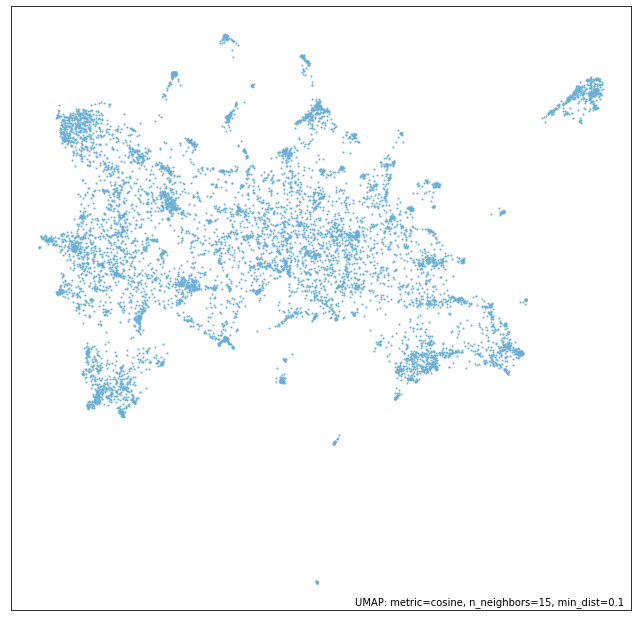

In [57]:
umap.plot.points(mapper)

In [ ]:
color_key={-1:'#000000'}

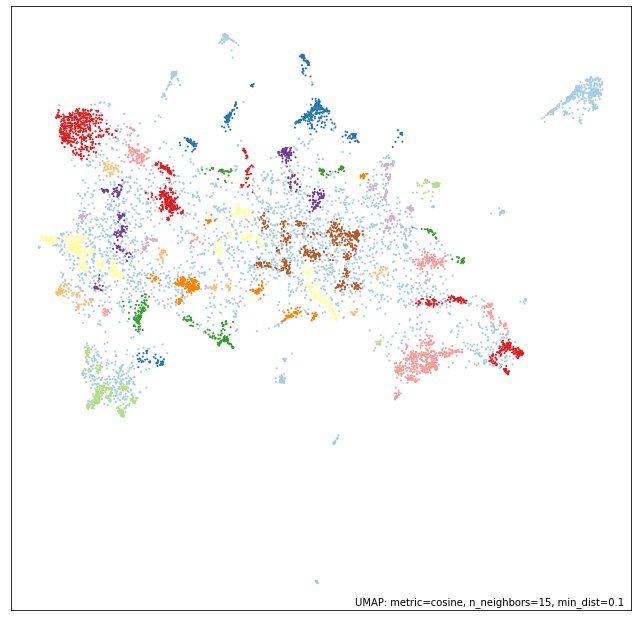

In [66]:
umap.plot.points(mapper,cluster.labels_, color_key_cmap='Paired',show_legend=False)

In [43]:
hdbscan_args = {'min_cluster_size': 15,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(mapper.embedding_)

NameError: ignored

In [44]:
import hdbscan

In [45]:
hdbscan_args = {'min_cluster_size': 15,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(mapper.embedding_)

In [61]:
cluster.labels_

array([40, -1, -1, ..., 86, 36, 87])

In [50]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:

color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in cluster.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, cluster.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

IndexError: ignored